# 🚀 STEP 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 🚀 STEP 2: Load Dataset



In [2]:
df = pd.read_csv("/Users/shashi/Desktop/project/Claims-Settlement-Optimization/final_saved_claims_dataset.csv")

# 🚀 STEP 3: Encode Categorical Columns



In [3]:
le_claim_type = LabelEncoder()
df["claim_type_encoded"] = le_claim_type.fit_transform(df["claim_type"])

le_action = LabelEncoder()
df["action_encoded"] = le_action.fit_transform(df["recommended_action"])

# 🚀 STEP 4: Feature Selection



In [4]:
features = [
    "claim_type_encoded", "claim_amount", "customer_age", "customer_tenure",
    "previous_claims_count", "legal_complexity", "estimated_legal_cost",
    "customer_satisfaction", "fraud_risk_score", "churn_risk", "region_risk_score"
]

X = df[features]
y_class = df["action_encoded"]

# 🚀 STEP 5: Train-Test Split



In [5]:
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# 🚀 STEP 6: Model Selection using GridSearchCV (for Best Parameters)



In [6]:
param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [6, 8, None],
}

clf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="f1_weighted"
)
clf_grid.fit(X_train, y_train_class)
clf = clf_grid.best_estimator_

# 🚀 STEP 7: Evaluate Classifier Accuracy


In [7]:
y_pred_class = clf.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test_class, y_pred_class))

cv_scores = cross_val_score(clf, X, y_class, cv=5)
print("✅ Cross-Validation Accuracy:", round(cv_scores.mean(), 4))



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.96      0.90      0.92        48

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

✅ Cross-Validation Accuracy: 0.932


# 🚀 STEP 8: Feature Importance Check (Optional but Useful)


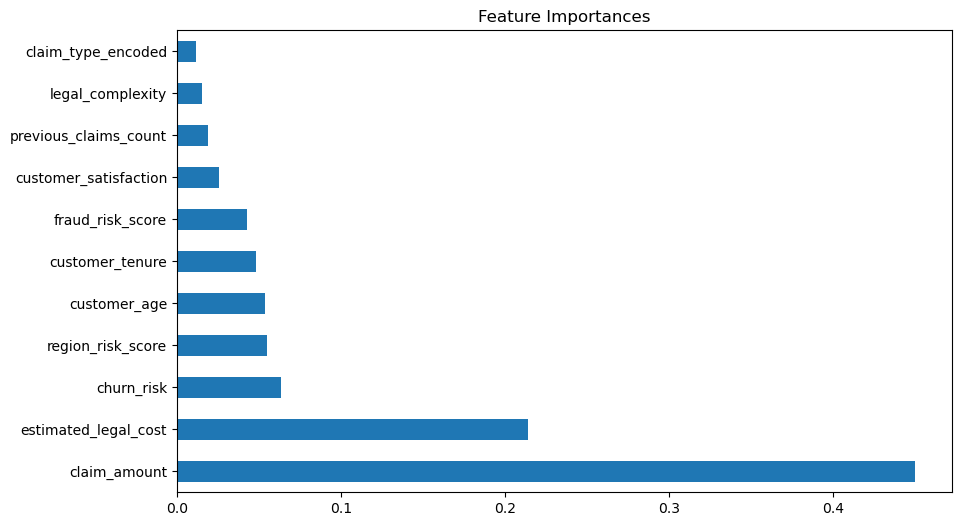

In [8]:
importances = pd.Series(clf.feature_importances_, index=features)
importances.sort_values(ascending=False).plot(kind="barh", title="Feature Importances", figsize=(10,6))
plt.show()


# 🚀 STEP 9: Train Regressor on Settle Rows



In [9]:
df_settle = df[df["recommended_action"] == "Settle"]
X_reg = df_settle[features]
y_reg = df_settle["recommended_settlement"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

# 🚀 STEP 10: User Input for Prediction


In [10]:
print("\nEnter claim details for prediction:")
user_input = {
    "claim_type": input("Claim Type (Auto, Health, Property, Life): "),
    "claim_amount": float(input("Claim Amount (e.g., 250000): ")),
    "customer_age": int(input("Customer Age: ")),
    "customer_tenure": float(input("Customer Tenure (years): ")),
    "previous_claims_count": int(input("Previous Claims Count: ")),
    "legal_complexity": int(input("Legal Complexity (1-5): ")),
    "estimated_legal_cost": float(input("Estimated Legal Cost: ")),
    "customer_satisfaction": int(input("Customer Satisfaction (1-5): ")),
    "fraud_risk_score": float(input("Fraud Risk Score (0 to 1): ")),
    "churn_risk": float(input("Churn Risk (0 to 1): ")),
    "region_risk_score": float(input("Region Risk Score (0 to 1): "))
}



Enter claim details for prediction:


# 🚀 STEP 11: Encode User Input & Format as DataFrame



In [11]:
user_input["claim_type_encoded"] = le_claim_type.transform([user_input["claim_type"]])[0]
del user_input["claim_type"]

user_df = pd.DataFrame([user_input])[features]

# 🚀 STEP 12: Make Predictions


In [12]:
action_pred = clf.predict(user_df)[0]
action_label = le_action.inverse_transform([action_pred])[0]

if action_label == "Settle":
    settlement_amount = reg.predict(user_df)[0]
else:
    settlement_amount = 0.0


# 🚀 STEP 13: Display Output


In [13]:
print("\n🧠 Predicted Recommendation:")
print(f"👉 Recommended Action: {action_label}")
print(f"👉 Recommended Settlement Amount: ₹{round(settlement_amount, 2)}")



🧠 Predicted Recommendation:
👉 Recommended Action: Settle
👉 Recommended Settlement Amount: ₹112687.41
